# Exercise 7:  Linear models

This homework assignment is designed to give you practice with linear models and the bias-variance tradeoff.

You will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository.


This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework datasets/hcp_data* folder in the class GitHub repository.

---
## 1. Loading the Data (1 point)

Use the `setwd` and `read.csv` functions to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file.

Using the tidyverse tools, make a new dataframe `d1` that only inclues the subject ID (`Subject`), gender (`Gender`), Flanker Task performance (`Flanker_Unadj`), total white matter volume (`FS_Tot_WM_Vol`), and total grey matter volume (`FS_Total_GM_Vol`) variables and remove all _na_ values.

Use the `head` function to look at the first few rows of each data frame.

In [26]:
library(tidyverse)
setwd("~/Documents/DataSciencePsychNeuro/Exercise datasets/hcp_data")
full_table <- read.csv("unrestricted_trimmed_1_7_2020_10_50_44.csv")
head(full_table,10) 

d1 <- full_table %>% #keep only desired variables
    select(Subject, Gender, Flanker_Unadj, FS_Tot_WM_Vol, FS_Total_GM_Vol)

d1 <- d1 %>% #drop rows with NAs
    drop_na()

head(d1,10)


,Subject,Release,Acquisition,Gender,Age,MMSE_Score,PSQI_Score,PSQI_Comp1,PSQI_Comp2,PSQI_Comp3,⋯,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,100004,S900,Q06,M,22-25,29,8,1,2,2,⋯,5.2,101.12,86.45,2,45.9,107.17,105.31,1.80,0,1.80
2,100206,S900,Q11,M,26-30,30,6,1,1,1,⋯,6.0,108.79,97.19,1,49.7,72.63,72.03,1.84,0,1.84
3,100307,Q1,Q01,F,26-30,29,4,1,0,1,⋯,3.6,101.12,86.45,0,38.6,71.69,71.76,1.76,0,1.76
4,100408,Q3,Q03,M,31-35,30,4,1,1,0,⋯,2.0,108.79,98.04,2,52.6,114.01,113.59,1.76,2,1.68
5,100610,S900,Q08,M,26-30,30,4,1,1,0,⋯,2.0,122.25,110.45,0,38.6,84.84,85.31,1.92,1,1.88
6,101006,S500,Q06,F,31-35,28,2,1,1,0,⋯,6.0,122.25,111.41,0,38.6,123.80,123.31,1.80,0,1.80
7,101107,S500,Q06,M,22-25,29,9,1,1,3,⋯,6.8,108.79,97.19,1,50.1,134.65,131.38,1.84,0,1.84
8,101208,S1200,Q12,F,31-35,30,6,1,2,0,⋯,4.4,101.12,87.11,1,50.1,105.57,102.32,1.92,0,1.92
9,101309,S500,Q06,M,26-30,29,5,1,1,2,⋯,5.2,122.25,110.45,0,38.6,106.39,104.39,1.80,0,1.80


,Subject,Gender,Flanker_Unadj,FS_Tot_WM_Vol,FS_Total_GM_Vol
,<int>,<chr>,<dbl>,<int>,<int>
1,100206,M,130.42,543134,807245
2,100307,F,112.56,407292,664124
3,100408,M,121.18,500417,726206
4,100610,M,126.53,512946,762308
5,101006,F,101.85,429449,579632
6,101107,M,107.04,416995,665024
7,101309,M,113.67,491221,707674
8,101410,M,108.46,502143,773472
9,101915,F,98.94,405886,676282


---
## 2. Initial data visualization (2 point)

Use the `pairs` function to look at all the pairwise scatterplots of the variables in `d1`. Describe which variables seem positively correlated, negatively correlated, or not correlated at all.

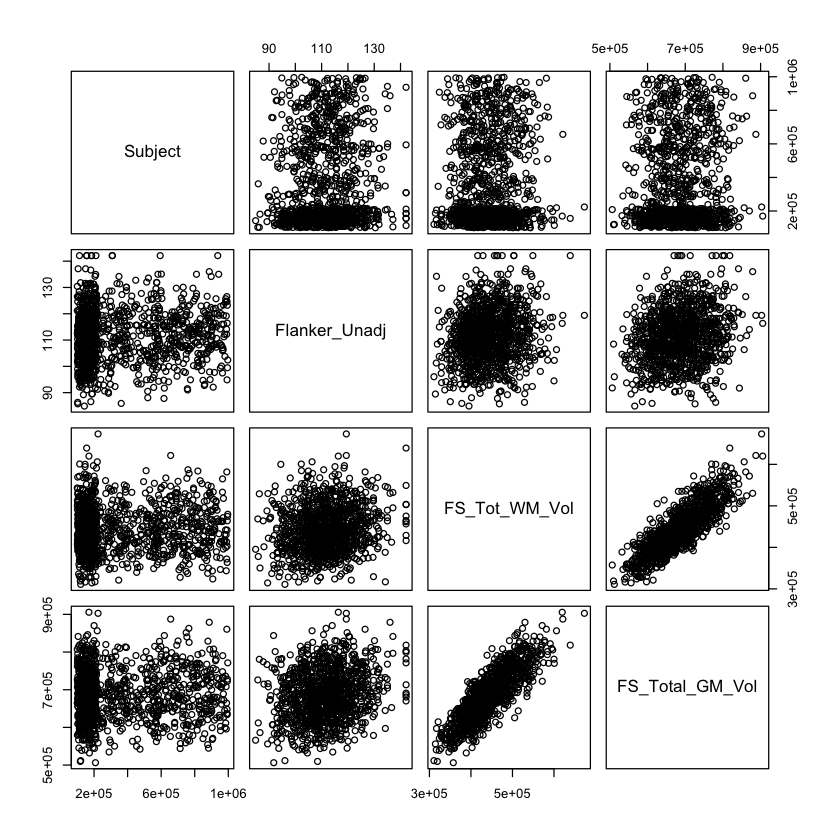

In [34]:
v <- c(1, 3, 4, 5) #exclude Gender because it cannot be used in a scatterplot and will throw an error
pairs(d1[, v])

* Unsurprisingly, the Subject number is not related at all to the other numeric variables.
* Total white matter volume and total grey matter volume have a strong positive correlation.
* It seems like WM volume and flanker task performance are not correlated, but GM volume and flanker task performance have a moderate positive correlation. 

---
## 3. Linear regression (4 points)

Use the `lm` (linear model) function to determine the association between Flanker Task performance and total grey matter volume from the `d1` data frame.

$$
Y_{flanker} = \beta_0 + \beta_1 X_{GM volume}
$$

Show the results using the `summary` function, and report the mean coefficient values for $beta_0$ \& $\beta_1$ (`coef` function) and their 95\% confidence intervals (`confint` function). Is grey matter volume significantly associated with Flanker Task performance?

In [53]:
GM_flanker_model <-lm(Flanker_Unadj ~ FS_Total_GM_Vol, data = d1) #syntax: lm(outcome ~ predictor, data = data name) 
summary(GM_flanker_model) 

coef(GM_flanker_model)
confint(GM_flanker_model)


Call:
lm(formula = Flanker_Unadj ~ FS_Total_GM_Vol, data = d1)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.2280  -6.5969  -0.0119   6.5497  31.0108 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     9.026e+01  3.041e+00  29.677  < 2e-16 ***
FS_Total_GM_Vol 3.110e-05  4.412e-06   7.048 3.18e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.864 on 1111 degrees of freedom
Multiple R-squared:  0.0428,	Adjusted R-squared:  0.04194 
F-statistic: 49.68 on 1 and 1111 DF,  p-value: 3.177e-12


(Intercept) FS_Total_GM_Vol 
   9.025646e+01    3.109965e-05

,2.5 %,97.5 %
(Intercept),8.428917e+01,9.622375e+01
FS_Total_GM_Vol,2.244198e-05,3.975733e-05


In [ ]:
Grey matter volume is significantly associated with Flanker Task performance, as indicated by the p value. But also based on the fact that the confidence interval for beta 1's coefficient does not include 0.

---
---

### If you use Generative AI (optional)
If you use code-assisting generative AI (e.g., Copilot, GPT, Claude; more than simple google searching), follow the steps below. If you do not use generative AI, skip this section and go directly to the coding part.

#### Step 1: Write pseudocode

Write pseudocode for `lm` model (or any other variables you have to print) below.

In [ ]:
# Write out your pseudo code here

#### Step 2: Generate code using generative AI
Using your pseudocode, prompt a generative AI to create or fix the R function. Then paste **only the generated function** below.

In [ ]:
# Paste generated function here

#### Step 3: Compare and verify the code

**Question 1.** What is different between your pseudocode and generated code.
(e.g., it handled NAs differently, used a different formula arrangement, etc.)

**Question 2.** What are the input parameters and the output of the function?
(Answer to show you understand what the function takes in and returns. Be concise.)

**Question 3.** Does anything has to be changed? (Yes / No)

> *Write your response here.*

> **Q1.**

> **Q2.**

> **Q3.** Yes / No

If you answers yes to the question 3, revise the code. Don't forget to paste your final version in the code block below.

---
---

> *Write your response here.*
>

---
## 4. Plotting (2 points)

Use `ggplot` to plot the `FS_Total_GM_Vol` variable (x axis) against the `Flanker_Unadj` variable (y axis), as well as the regression line with confidence intervals on the regrssion line. Qualitatively describe what you see.

`geom_smooth()` using formula = 'y ~ x'


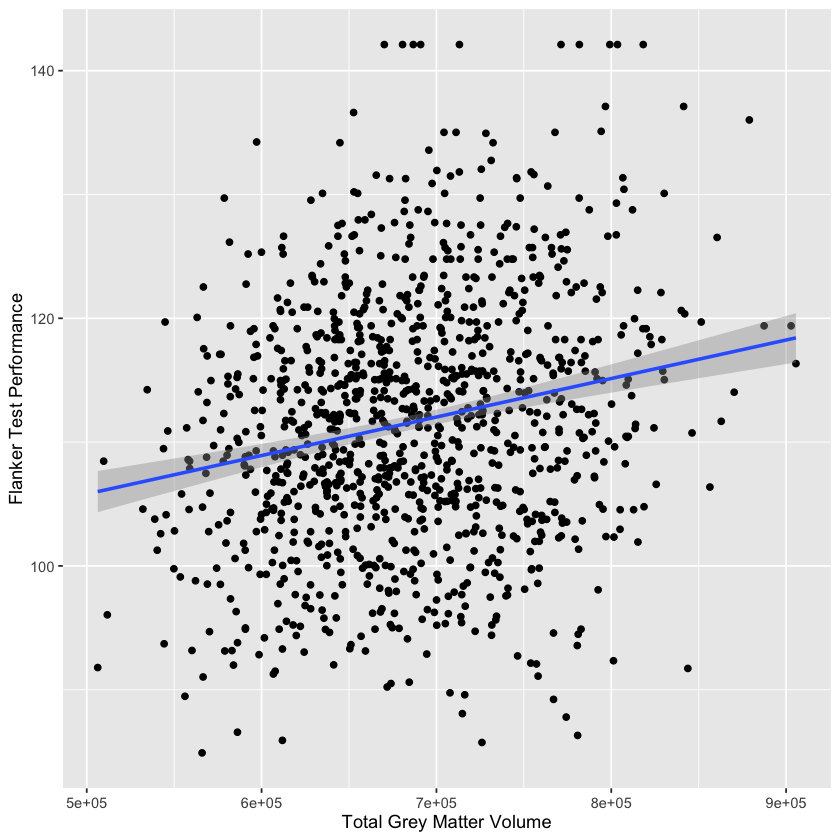

In [59]:
ggplot(d1, aes(x=FS_Total_GM_Vol, y=Flanker_Unadj)) +
    geom_point() +
    scale_x_continuous(name = 'Total Grey Matter Volume') + 
    scale_y_continuous(name = 'Flanker Test Performance') + 
    geom_smooth(method = "lm")



I see that the regression line describes a positive relationship between GM volume and flanker test performance.

---

## 5. Reflection (1 point)

What do you conclude based on the analyses above?

I conclude that there is a positive relationship between grey matter volume and performance on the flanker test. But based on the analyses, I now have two questions: 1)If only one factor is included in a linear model, how is the mathematics of finding the relationship between the predictor and outcome variable different from a simple correlation? I know that the goals can be formulated differently for correlation vs. regression, but at least based on eyeballing the graphs, it seems like similar analyses are done in these two operations. I am also wondering how to interpret the b1 coefficient here -- in the above analysis, it seems small but significant. But unlike a correlation coefficient, I am not sure how to interpret a beta weight in absolute terms. 

**DUE:** 11:59pm EST, Feb 19, 2026

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*